In [188]:
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
import pickle

# libreria normalización y estandarización
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler


# librerías de visualización
import seaborn as sns
import matplotlib.pyplot as plt

# para calcular las métricas
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score


import statsmodels.formula.api as smf

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn import tree


from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import RandomizedSearchCV

# soporte para limpieza
import sys
sys.path.append("../")

import src.soporte as sp

import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (15,10)

In [164]:
df_train = pd.read_csv("../data/train.csv")

In [165]:
df_train.head(3)

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,0.30,Premium,D,SI2,62.4,58.0,4.31,4.28,2.68,6.353
1,1,1.01,Ideal,E,VVS2,62.7,56.0,6.42,6.46,4.04,9.183
2,2,0.72,Ideal,F,VS2,61.8,59.0,5.71,5.74,3.54,7.983


In [166]:
df_train_  = df_train.copy()
df_train_ = df_train_[['id', 'carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z', 'price']]

In [167]:
df_elim = df_train_[(df_train_["z"] == 0) | (df_train_["x"] == 0) | (df_train_["y"] == 0)]
df_elim.shape

(17, 10)

In [168]:
df_train2 = df_train_.copy()

In [169]:
df_train2.drop(df_elim.index, axis = 0, inplace = True)

In [170]:
lista_columnas = df_train2.select_dtypes(include = np.number).columns
lista_columnas

Index(['id', 'carat', 'table', 'x', 'y', 'z', 'price'], dtype='object')

In [171]:
# aplicamos la función y sacamos los índices de los outliers.

indice = sp.detectar_outliers(lista_columnas, df_train2)

In [172]:
for k, v in indice.items():
    mean = df_train2[k].mean() # calculamos la media para cada una de las columnas que tenemos en nuestro diccionario
    for i in v: # iteremos por la lista de valores para cada columna
        df_train2.loc[i,k] = mean 

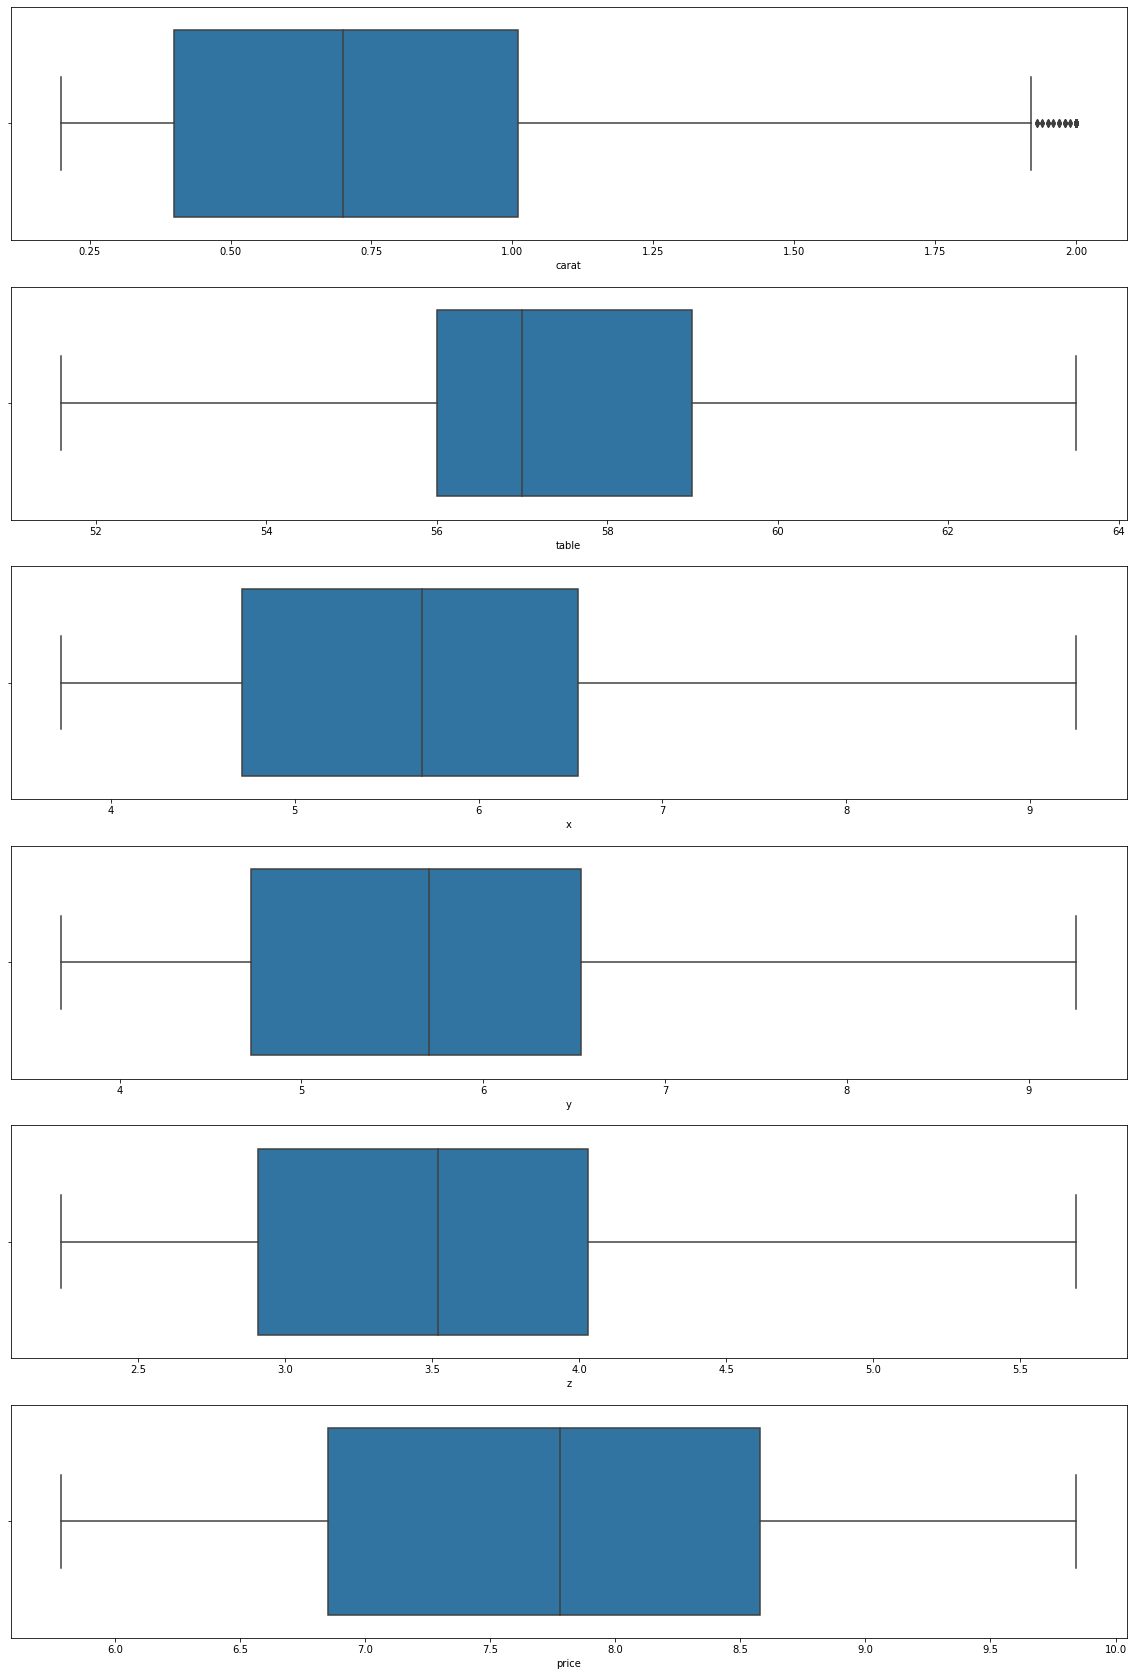

In [173]:
fig, ax = plt.subplots(6, 1, figsize=(20,30))

df_number = df_train2[['carat', 'table', 'x', 'y', 'z', 'price']]
for i in range(len(df_number.columns)):
    sns.boxplot(x = df_number.columns[i], data = df_number, ax = ax[i])
plt.show();

<h2>Estandarización</h2>

In [174]:
robust = RobustScaler()

In [175]:
robust.fit(df_train2[['carat','table', 'x', 'y', 'z']])

RobustScaler()

In [176]:
X_robust = robust.transform(df_train2[['carat', 'table', 'x', 'y', 'z']])

In [177]:
df_train3 = df_train2.copy()

In [178]:
df_train3[['carat', 'table', 'x', 'y', 'z']] = X_robust
df_train3.head()

,id,carat,cut,color,clarity,table,x,y,z,price
0,0,-0.655738,Premium,D,SI2,0.333333,-0.754098,-0.781293,-0.750000,6.353
1,1,0.508197,Ideal,E,VVS2,-0.333333,0.398907,0.418157,0.464286,9.183
2,2,0.032787,Ideal,F,VS2,0.666667,0.010929,0.022008,0.017857,7.983
3,3,0.622951,Very Good,G,SI2,0.000000,0.464481,0.440165,0.535714,8.371
4,4,-0.557377,Premium,G,VS1,0.666667,-0.650273,-0.632737,-0.625000,6.588


In [179]:
with open('../data/modelo_5/estandarizacion.pkl', 'wb') as s:
    pickle.dump(robust, s)

In [180]:
robust_2 = RobustScaler()
robust_2.fit(df_train3[['price']])
X_robust_2 = robust_2.transform(df_train3[['price']])
df_train3[['price']] = X_robust_2

with open('../data/modelo_5/estandarizacion_2.pkl', 'wb') as s:
    pickle.dump(robust_2, s)

<h2>Encoding</h2>

In [181]:
df_train4 = df_train3.copy()

In [182]:
cut_ = sp.ordinal_map_con(df_train4, "cut", ["Ideal", "Very Good", "Good", "Premium", "Fair"])

with open(f'../data/modelo_5/encoding_cut_2.pkl', 'wb') as s:
        pickle.dump(cut_, s)


In [183]:
color_ = sp.ordinal_map_con(df_train4, "color", ["E", "D", "F", "G", "H", "I", "J"])

with open(f'../data/modelo_5/encoding_color_2.pkl', 'wb') as s:
        pickle.dump(color_, s)

In [184]:
clar_ = sp.ordinal_map_con(df_train4, "clarity", ["VVS1", "IF", "VVS2", "VS1", "VS2", "SI1", "I1", "SI2"])

with open(f'../data/modelo_5/encoding_clarity_2.pkl', 'wb') as s:
        pickle.dump(clar_, s)

In [185]:
df_train4.head()

,id,carat,cut,color,clarity,table,x,y,z,price,cut_mapeada,color_mapeada,clarity_mapeada
0,0,-0.655738,Premium,D,SI2,0.333333,-0.754098,-0.781293,-0.750000,-0.824754,0.101615,-0.094948,0.223422
1,1,0.508197,Ideal,E,VVS2,-0.333333,0.398907,0.418157,0.464286,0.812030,-0.082647,-0.124960,-0.146243
2,2,0.032787,Ideal,F,VS2,0.666667,0.010929,0.022008,0.017857,0.117987,-0.082647,-0.009408,-0.010769
3,3,0.622951,Very Good,G,SI2,0.000000,0.464481,0.440165,0.535714,0.342394,0.008641,0.011055,0.223422
4,4,-0.557377,Premium,G,VS1,0.666667,-0.650273,-0.632737,-0.625000,-0.688837,0.101615,0.011055,-0.032625


In [186]:
df = df_train4.copy()
df = df_train4[['carat', 'table', 'x', 'y', 'z', 'cut_mapeada', 'color_mapeada', 'clarity_mapeada', 'price']]
df.head(5)

,carat,table,x,y,z,cut_mapeada,color_mapeada,clarity_mapeada,price
0,-0.655738,0.333333,-0.754098,-0.781293,-0.750000,0.101615,-0.094948,0.223422,-0.824754
1,0.508197,-0.333333,0.398907,0.418157,0.464286,-0.082647,-0.124960,-0.146243,0.812030
2,0.032787,0.666667,0.010929,0.022008,0.017857,-0.082647,-0.009408,-0.010769,0.117987
3,0.622951,0.000000,0.464481,0.440165,0.535714,0.008641,0.011055,0.223422,0.342394
4,-0.557377,0.666667,-0.650273,-0.632737,-0.625000,0.101615,0.011055,-0.032625,-0.688837


<h2>Decision Tree</h2>

In [194]:
X = df.drop("price", axis = 1)
y = df["price"] 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state = 42)

In [195]:
y_train.describe()

count    36394.000000
mean         0.003478
std          0.587574
min         -1.152111
25%         -0.536726
50%          0.001735
75%          0.462695
max          1.193175
Name: price, dtype: float64

In [196]:
y_test.describe()

count    4044.000000
mean       -0.006023
std         0.591909
min        -1.131290
25%        -0.538462
50%        -0.023135
75%         0.466744
max         1.191440
Name: price, dtype: float64

In [197]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [198]:
max_features = np.sqrt(len(X_train.columns))
max_features

2.8284271247461903

In [199]:
print(regressor.tree_.max_depth)

34


In [200]:
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [201]:
dt_results1 = sp.metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,0.049113,0.005014,0.070811,0.985685,test,Decission Tree I
1,0.000113,0.000005,0.002260,0.999985,train,Decission Tree I


In [202]:
df_all = dt_results1.copy()

In [203]:
# Generación del GridSearch
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [6, 7, 8, 9, 10],
        "min_samples_split": [10, 20, 30, 40, 50, 60, 100, 150, 200],
        "max_features": [4, 5, 6, 7]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [204]:
%%time
gs.fit(X_train, y_train)

CPU times: total: 3.52 s
Wall time: 22.5 s


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'max_features': [4, 5, 6, 7],
                         'min_samples_split': [10, 20, 30, 40, 50, 60, 100, 150,
                                               200]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [205]:
best_tree = gs.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=10, max_features=7, min_samples_split=10)

In [206]:
y_pred_test_dt = gs.predict(X_test)
y_pred_train_dt = gs.predict(X_train)

In [207]:
dt_results2 = sp.metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree II")
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.051546,0.004516,0.067198,0.987108,test,Decission Tree II
1,0.047247,0.003764,0.061350,0.989098,train,Decission Tree II


In [208]:
df_all = pd.concat([df_all, dt_results2 ], axis = 0)
df_all

,MAE,MSE,RMSE,R2,set,modelo
0,0.049113,0.005014,0.070811,0.985685,test,Decission Tree I
1,0.000113,0.000005,0.002260,0.999985,train,Decission Tree I
0,0.051546,0.004516,0.067198,0.987108,test,Decission Tree II
1,0.047247,0.003764,0.061350,0.989098,train,Decission Tree II


<h2>Random Forest</h2>

In [211]:
param = {"max_depth": [8, 9, 10],
        "min_samples_split": [10, 20, 40, 50],
        "max_features": [5, 6, 7]}

bosque = GridSearchCV(
            estimator=RandomForestRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [212]:
%%time
bosque.fit(X_train, y_train)

CPU times: total: 9.2 s
Wall time: 13min 27s


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [6, 7, 8, 9, 10],
                         'max_features': [4, 5, 6, 7],
                         'min_samples_split': [10, 20, 40, 50, 60, 70]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [213]:
bos = bosque.best_estimator_
bos

RandomForestRegressor(max_depth=10, max_features=7, min_samples_split=10)

In [214]:
y_pred_test_rf = bos.predict(X_test)
y_pred_train_rf = bos.predict(X_train)

In [215]:
rf_results = sp.metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
rf_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.045919,0.003632,0.060269,0.989630,test,Random Forest
1,0.042153,0.003008,0.054849,0.991286,train,Random Forest


In [216]:
df_all = pd.concat([df_all, rf_results ], axis = 0)
df_all

,MAE,MSE,RMSE,R2,set,modelo
0,0.049113,0.005014,0.070811,0.985685,test,Decission Tree I
1,0.000113,0.000005,0.002260,0.999985,train,Decission Tree I
0,0.051546,0.004516,0.067198,0.987108,test,Decission Tree II
1,0.047247,0.003764,0.061350,0.989098,train,Decission Tree II
0,0.045919,0.003632,0.060269,0.989630,test,Random Forest
1,0.042153,0.003008,0.054849,0.991286,train,Random Forest


<h2>Gradient</h2>

In [ ]:
param = {"max_depth": [8, 9, 10],
         "min_samples_split": [10, 20, 50, 80],
         "max_features": [5, 6, 7], 
         "min_samples_leaf": [10, 20, 50, 80]}

grid = GridSearchCV(
        estimator  = GradientBoostingRegressor(),
        param_grid = param,
        cv=10,
        verbose=0,
        n_jobs = -1,
        return_train_score = True,
        scoring="neg_mean_squared_error")

In [ ]:
grid.fit(X = X_train, y = y_train)

In [ ]:
grid.best_params_

In [ ]:
y_pred_gb_test= grid.predict(X_test)
y_pred_gb_train= grid.predict(X_train)

In [ ]:
grid_result = sp.metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Gradient")

In [ ]:
df_all = pd.concat([df_all, grid_result ], axis = 0)
df_all

In [221]:
with open('../data/modelo_5/mejor_modelo.pkl', 'wb') as modelo:
        pickle.dump(bosque, modelo)